## Importações
Instalar caso não tenha na maquina, o bokeh e astropy

In [ ]:
from IPython.display import clear_output
#!pip install bokeh
#!pip install astropy
clear_output()
%matplotlib inline # necessário apenas para notebooks
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import ascii
from astropy.timeseries import LombScargle
from bokeh import plotting
from bokeh.models import Span
plotting.output_notebook() # necessário apenas para notebooks

## Definidas as funções de plotagem, listagem do dataset e busca do mesmo

In [ ]:
def listagem_dir(dir):
    import os
    pasta = dir
    data=[]
    for diretorio, subpastas, arquivos in os.walk(pasta):
        for arquivo in arquivos:
            data.append(os.path.join(diretorio,arquivo))
    return data

x = []
identity = []
def datasets(dir,size,classe):
    i = 0
    for i in range(size):
            t = Table.read(listagem_dir(dir)[i+1], format='ascii',names=['HJD','mag','err']).to_pandas()
            identity.append(listagem_dir(dir)[i+1].split('/')[5])
            x.append(t)
    return x

def busca():
    star = 'OGLE'
    print(
    """info:
        target = NULL retorna todos os target
        target = LMC/SMC retorna os grupos
        target = numeração retorna a estrela específica
        
    Parameter Target:
      Choose OGLE observations region:
        LMC - Large Magellanic Cloud
        SMC - Small Magellanic Cloud
        BLG - Galactic bulge
        GD  - Galactic disk
        
    Parameter ID:
        OGLE-SMC-CEP-4987,
        OGLE-LMC-CEP-4709,
        OGLE-BLG-CEP-021,
        OGLE-GD-CEP-0555""")

    star = input("\n\nidentifique o target: ")
    for i in range(len(identity)):
        if star in identity[i]:
            print(f'index:\ttarget:\n{i}\t{identity[i]}')

def ploting(index):
    # Start figure and axis.
    fig, ax = plt.subplots()

    # Plot the timeseries in black circles.
    ax.plot(cepheids[index]["HJD"], cepheids[index]["mag"], 'ko')

    # Let's label the axes and define a title for the figure.
    fig.suptitle(f"{identity[index].split('.')[0]} - I-Band")
    ax.set_ylabel("Magnitude")
    ax.set_xlabel("HJD")
    plt.show()
  
def Detrended_Lightcurve(index):

  bfig = plotting.figure(plot_width=850, plot_height=300, title=f'Detrended Lightcurve ({identity[index].split(".")[0]})')

  bfig.circle(cepheids[index]['HJD'], cepheids[index]['mag'], fill_color="black", size=4, line_color=None)
  bfig.line(cepheids[index]['HJD'], cepheids[index]['mag'], line_color='black')

  bfig.xaxis.axis_label = "Time (HJD)"
  bfig.yaxis.axis_label = "Magnitude"

  plotting.show(bfig)

def periodograma(index, frequency, power):
    bfig = plotting.figure(plot_width=850, plot_height=300, x_range=(0,25),
                        title=f"Periodogram ({identity[index].split('.')[0]}Light Curve - I-Band)")
    bfig.line(frequency, power, line_color='black')
    bfig.xaxis.axis_label = "Frequency (1/day)"
    bfig.yaxis.axis_label = "Power"

    plotting.show(bfig)

def phased_light_curve(index):
  bfig = plotting.figure(plot_width=850, plot_height=300, title=f'Phased light curve ({identity[index].split(".")[0]} Light Curve - I-Band)')

  # plotagem da fase
  bfig.circle(cepheids[index]["HJD"]%(1/dominant_freq),cepheids[index]["mag"], fill_color="black",size=4, line_color=None)

  # plotagem do periodo fit
  t_fit = np.linspace(0,1/dominant_freq,100)
  bfig.line(t_fit, lomb.model(t_fit, dominant_freq), color='#1b9f00', line_width=2)

  # labels axis
  bfig.xaxis.axis_label = "fase (dias)"
  bfig.yaxis.axis_label = "Flux"
  plotting.show(bfig)

## Coleta e seleção dos dados

### Coletando os dados
Função:

(method) datasets: (dir: diretório, size: tamanho desejado, classe:any) - lista

Parâmetros

- dir : diretório
  - Caminho do dataset

- size : int
  - Tamanho que deseja coletar do dataset

- classe: any

In [ ]:
cepheids = datasets('/content/drive/MyDrive/datasets', len(listagem_dir('/content/drive/MyDrive/datasets'))//50, 0)

### Listando os dados coletados

(function) busca: () -> None

- retorna a listagem do diretório

In [ ]:
busca()

info:
        target = NULL retorna todos os target
        target = LMC/SMC retorna os grupos
        target = numeração retorna a estrela específica
        
    Parameter Target:
      Choose OGLE observations region:
        LMC - Large Magellanic Cloud
        SMC - Small Magellanic Cloud
        BLG - Galactic bulge
        GD  - Galactic disk
        
    Parameter ID:
        OGLE-SMC-CEP-4987,
        OGLE-LMC-CEP-4709,
        OGLE-BLG-CEP-021,
        OGLE-GD-CEP-0555


identifique o target: 
index:	target:
0	OGLE-LMC-CEP-2388.dat
index:	target:
1	OGLE-SMC-CEP-1482.dat
index:	target:
2	OGLE-SMC-CEP-2266.dat
index:	target:
3	OGLE-SMC-CEP-0446.dat
index:	target:
4	OGLE-SMC-CEP-1232.dat
index:	target:
5	OGLE-SMC-CEP-2128.dat
index:	target:
6	OGLE-SMC-CEP-1179.dat
index:	target:
7	OGLE-SMC-CEP-0940.dat
index:	target:
8	OGLE-SMC-CEP-1008.dat
index:	target:
9	OGLE-SMC-CEP-0646.dat
index:	target:
10	OGLE-LMC-CEP-1795.dat
index:	target:
11	OGLE-SMC-CEP-1408.dat
index:	target:
12	OGL

### Seleção do target, com base na listagem a cima

In [ ]:
index = int(input("Escolha o index do target: "))
print(f'target selecionado: {identity[index]}')

Escolha o index do target: 43
target selecionado: OGLE-SMC-CEP-0829.dat


## Plotagem


### Plot da relaçõa time o magnitude

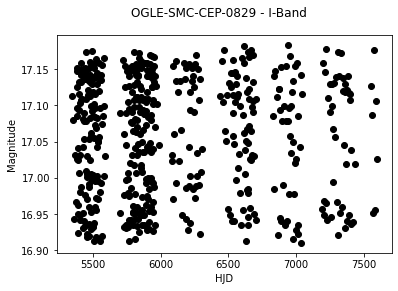

In [ ]:
ploting(index)

### Plot sem definir uma tendência(sem um período definido)

In [ ]:
Detrended_Lightcurve(index)

### Plot do periodograma

In [ ]:
lomb = LombScargle(cepheids[index]["HJD"], cepheids[index]["mag"])
frequency, power = lomb.autopower(maximum_frequency= 25)
periodograma(index, frequency, power)

### Encontrando um período (dias e horas)

In [ ]:
dominant_freq = frequency[np.argmax(power)]
print(f'{identity[index].split(".")[0]}\nperíodo dominante: {1/dominant_freq:.5} dias\nperíodo dominante: {1/dominant_freq*24:.3} horas')

OGLE-SMC-CEP-0829
período dominante: 0.92883 dias
período dominante: 22.3 horas


### Plot da curva de luz em fase

In [ ]:
phased_light_curve(index)